In [3]:
import pandas as pd
from code.gru.gru import gru
from code.parser.parse import Parser
from code.gru.gru import GRUModel
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from code.wiener_kolmogorov.wiener_kolmogorov import WienerKolmogorov as WK
from code.detector.detector import  Detector
import numpy as np
from scipy.signal import medfilt
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from keras.models import load_model

In [4]:
def rates(true, pre, positives, negatives):
    tn, fp, fn, tp = confusion_matrix(true, pre).ravel()
    return accuracy_score(true, pre), tp / positives, tn / negatives

In [5]:
def lstm_data_transform(x_data, y_data, num_steps=5):
    X, y = list(), list()
    for i in range(x_data.shape[0]):
        end_ix = i + num_steps
        if end_ix >= x_data.shape[0]:
            break
        seq_X = x_data[i:end_ix]
        seq_y = y_data[end_ix]
        X.append(seq_X)
        y.append(seq_y)
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [6]:
def clean(preds):
    res= []
    for pred in preds:
        d0 = abs(pred - 0)
        d1 = abs(pred - 1)
        if d0 < d1:
            res.append(0)
        else:
            res.append(1)
    return res

In [24]:

df = pd.read_csv('../../runs/3/office.csv')
df = df[:2100]
df = df[["RSSI"]]

window = 300
zeros = np.zeros(window)
ones = np.ones(window)
y = ones
l = len(ones) + window
f = True
while l <= 2100:
    if f:
        y = np.concatenate((y, zeros))
        f = False
    else:
        y = np.concatenate((y, ones))
        f = True
    l += window
num_steps = 500

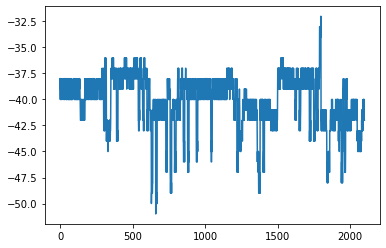

In [25]:
plt.plot(df.RSSI)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.285, shuffle=True)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [9]:
filter = WK()
filter.fit(df.RSSI.to_numpy()[300:599], k =0.3)
y1, y2 = filter.transform(X_test.RSSI[:299]), filter.transform(X_test.RSSI[299:-1])

In [10]:
y_pred = np.concatenate([y1,y2])

In [11]:
np.var(y_pred)

3.9068702697587967

In [12]:
np.var(X_test.RSSI.to_numpy())

8.332579898049337

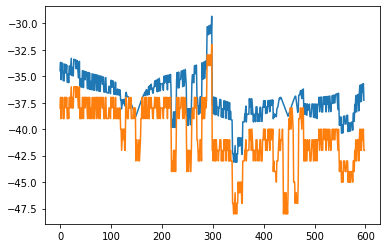

In [13]:
plt.plot(y_pred)
plt.plot(X_test.RSSI.to_numpy())

In [14]:
y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [15]:
def hampel(vals_orig):
    vals = vals_orig.copy()
    difference = np.abs(np.median(vals)-vals)
    median_abs_deviation = np.median(difference)
    threshold = 2 * median_abs_deviation
    outlier_idx = difference > threshold
    return outlier_idx

In [16]:
from scipy.signal import wiener
wi = wiener(X_test.RSSI.to_numpy(), mysize=30)

In [17]:
hampel(wi)[333:]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False,

In [18]:
y_pred = np.concatenate((np.zeros(333), np.ones(len(y_test)- 333)))

In [19]:
len(y_pred)

599

In [20]:
cleaned = y_pred
acc, tpr, tnr = rates(y_test, cleaned, sum(cleaned), len(cleaned) - sum(cleaned))
print(acc, tpr, tnr)

0.9432387312186978 1.0 0.8978978978978979


In [23]:
y_pred = np.concatenate((np.zeros(360), np.ones(len(y_test)- 360)))
cleaned = y_pred
acc, tpr, tnr = rates(y_test, cleaned, sum(cleaned), len(cleaned) - sum(cleaned))
print(acc, tpr, tnr)

0.8981636060100167 1.0 0.8305555555555556
